# **Convolution Neural Network Model**


>
CNN or Convolutional Neural Network is a Deep Learning algorithm and a subset of machine learning. A CNN model can be used in different applications and data types. Usually CNN is used for image classification (or) process involving processing of pixel data
>

**Applications:**


Face detection

Object Recognition

Digit Classification

Biometrics


In [ ]:
pip install RISE

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from traitlets.config.manager import BaseJSONConfigManager
from pathlib import Path
path = Path.home() / ".jupyter" / "nbconfig"
cm = BaseJSONConfigManager(config_dir=str(path))
tmp = cm.update(
        "rise",
        {
            "theme": "serif",
            "transition": "fade",
            "start_slideshow_at": "selected",
            "autolaunch": True,
            "width": "100%",
            "height": "100%",
            "header": "",
            "footer":"",
            "scroll": True,
            "enable_chalkboard": True,
            "slideNumber": True,
            "center": False,
            "controlsLayout": "edges",
            "slideNumber": True,
            "hash": True,
        }
    )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.regularizers import l2
from keras.layers import Dropout
from keras import regularizers
from collections import Counter

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#print(x_train[0])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train_n = x_train.astype('float32')
x_test_n = x_test.astype('float32')
x_train_norm = x_train_n / 255.0
x_test_norm = x_test_n / 255.0

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=50, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/50
1875/1875 [==============================] - 16s 3ms/step - loss: 0.4904 - accuracy: 0.8256 - val_loss: 0.3376 - val_accuracy: 0.8794
Epoch 2/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3553 - accuracy: 0.8735 - val_loss: 0.3079 - val_accuracy: 0.8898
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3245 - accuracy: 0.8842 - val_loss: 0.2985 - val_accuracy: 0.8926
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3061 - accuracy: 0.8900 - val_loss: 0.2875 - val_accuracy: 0.8960
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2931 - accuracy: 0.8948 - val_loss: 0.2637 - val_accuracy: 0.9061
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2804 - accuracy: 0.8992 - val_loss: 0.2651 - val_accuracy: 0.9062
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2730 - accuracy: 0.9021 - val_loss: 0.2640 - val_accuracy

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 32)        0         
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                        

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 92.05999970436096


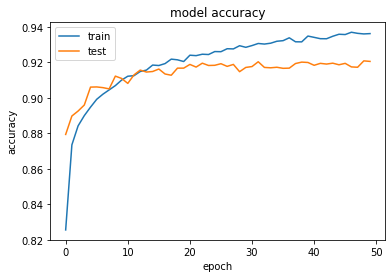

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

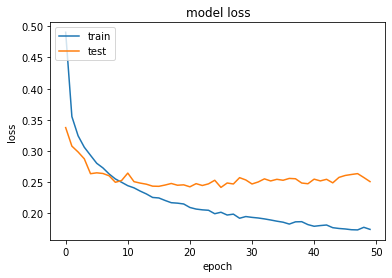

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Tuning Hyperparameters**

>

In order to get the best accuracy model the hyperparameters of the model such as Activation functions, Initializers, Kernel Size, Optimizers are changed and tested on fashion_mnist dataset.

# **Changing Dropout Values**

>
Dropout Layer in a CNN model is a mask used to silence some of the nodes or neurons from the current layer and allows all the other nodes or neurons to pass to the other layer. The CNN model nullifies the nodes by assigning input float values from 0 to 1 with a frequency of rate at each step during training and it is used to prevent overfitting of the model. In our model we used three different values to increase the accuracy i.e., (0.2,0.4,0.6). our model uses (0.5) for the first dropout layer and (0.4) for the second dropout layer.

In [ ]:
#changing Dropout values to 0.2
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 22s 6ms/step - loss: 0.4715 - accuracy: 0.8339 - val_loss: 0.3350 - val_accuracy: 0.8798
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3372 - accuracy: 0.8817 - val_loss: 0.2975 - val_accuracy: 0.8926
Epoch 3/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3020 - accuracy: 0.8939 - val_loss: 0.2795 - val_accuracy: 0.8974
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2784 - accuracy: 0.9011 - val_loss: 0.2778 - val_accuracy: 0.8997
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2621 - accuracy: 0.9063 - val_loss: 0.2746 - val_accuracy: 0.9002
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2451 - accuracy: 0.9110 - val_loss: 0.2623 - val_accuracy: 0.9079
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2333 - accuracy: 0.9165 - val_loss: 0.2602 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.64999723434448


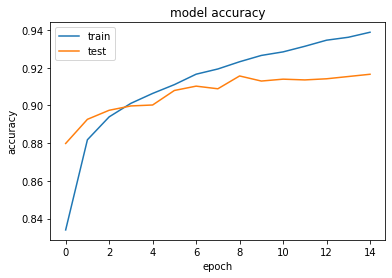

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

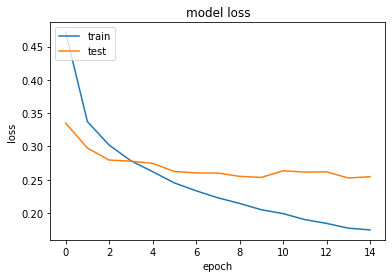

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#changing Dropout values to 0.4
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.4))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4834 - accuracy: 0.8304 - val_loss: 0.3551 - val_accuracy: 0.8713
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3533 - accuracy: 0.8739 - val_loss: 0.2975 - val_accuracy: 0.8936
Epoch 3/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3181 - accuracy: 0.8881 - val_loss: 0.2974 - val_accuracy: 0.8945
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2978 - accuracy: 0.8939 - val_loss: 0.2821 - val_accuracy: 0.8948
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2847 - accuracy: 0.8982 - val_loss: 0.2675 - val_accuracy: 0.9046
Epoch 6/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2710 - accuracy: 0.9027 - val_loss: 0.2710 - val_accuracy: 0.9043
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2573 - accuracy: 0.9074 - val_loss: 0.2653 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.10999703407288


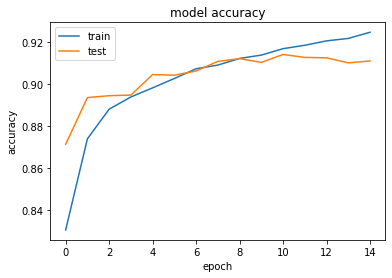

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

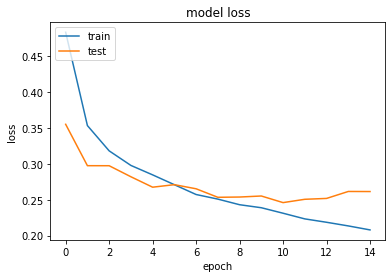

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#changing Dropout values to 0.6
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.6))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.6))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.5338 - accuracy: 0.8085 - val_loss: 0.3693 - val_accuracy: 0.8694
Epoch 2/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3922 - accuracy: 0.8604 - val_loss: 0.3279 - val_accuracy: 0.8839
Epoch 3/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3566 - accuracy: 0.8731 - val_loss: 0.2979 - val_accuracy: 0.8945
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3360 - accuracy: 0.8789 - val_loss: 0.2955 - val_accuracy: 0.8952
Epoch 5/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3186 - accuracy: 0.8868 - val_loss: 0.2818 - val_accuracy: 0.8991
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3088 - accuracy: 0.8893 - val_loss: 0.2774 - val_accuracy: 0.8988
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2996 - accuracy: 0.8926 - val_loss: 0.2812 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.01999998092651


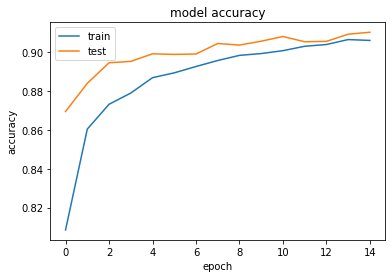

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

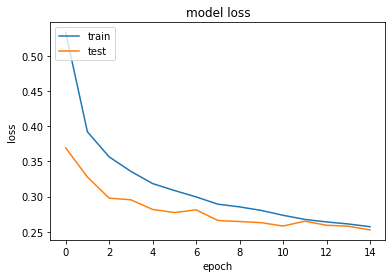

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Changing Activation Functions**
>
Activation functions are the main part of any CNN architecture. The choice of particular activation function in all the hidden layers controls the output layer and the training of the model. this function controls the predictions of the model by comparing the input value to the threshold value. if the given input value is greater than the threshold value the neurons are activated if the input value is lesser then the next layer is disabled. In our model we use relu - softmax and tested three activation functions selu - sotmax, tanh - softmax, gelu - softmax
>

ReLu: 

The rectified linear activation function is a precise function which gives the input to the next layer directly from the output of previous layer if it is positive, otherwise it will input zero. 

SeLu:

Scaled Exponential Linear Units are the activation functions using self-normalization properties and it needs both positive and negative values to shift the mean. Selu then gives the ouput by calculating a weighted total and adds bias to the neuron and check if the neuron is activated or not.


Tanh:

tanh or hyperbolic tangent activation function measures the neuron like logistic sigmoid function but the range of the tanh activation function is only from (-1 , 1) and the graph based on the input values from the previous layer is also sigmoidal. In this tanh function all the negative inputs will be strongly mapped to negative and zero input will be mapped near zeros in the respective tanh graph. with this process the graph determines if the neuron is activated or not.

In [ ]:
#changing activation functions selu - relu -softmax
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='selu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='selu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='selu'))
model.add(Flatten())
model.add(Dense(64, activation='selu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4846 - accuracy: 0.8308 - val_loss: 0.3711 - val_accuracy: 0.8691
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3886 - accuracy: 0.8641 - val_loss: 0.3520 - val_accuracy: 0.8772
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3681 - accuracy: 0.8707 - val_loss: 0.3277 - val_accuracy: 0.8837
Epoch 4/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.3493 - accuracy: 0.8781 - val_loss: 0.3273 - val_accuracy: 0.8816
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3349 - accuracy: 0.8805 - val_loss: 0.3065 - val_accuracy: 0.8884
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3273 - accuracy: 0.8845 - val_loss: 0.3038 - val_accuracy: 0.8905
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3195 - accuracy: 0.8872 - val_loss: 0.2957 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 90.70000052452087


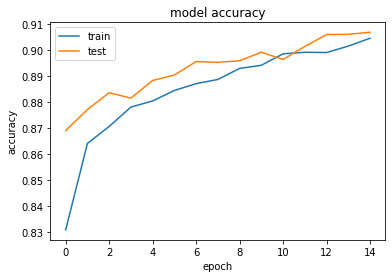

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

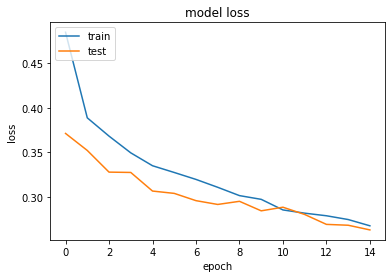

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#changing activation functions tanh - relu -softmax
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='tanh', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='tanh'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='tanh'))
model.add(Flatten())
model.add(Dense(64, activation='tanh'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4735 - accuracy: 0.8327 - val_loss: 0.3593 - val_accuracy: 0.8750
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3738 - accuracy: 0.8670 - val_loss: 0.3337 - val_accuracy: 0.8807
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3415 - accuracy: 0.8787 - val_loss: 0.3024 - val_accuracy: 0.8927
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3256 - accuracy: 0.8838 - val_loss: 0.2964 - val_accuracy: 0.8921
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3096 - accuracy: 0.8892 - val_loss: 0.2916 - val_accuracy: 0.8956
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3007 - accuracy: 0.8915 - val_loss: 0.2820 - val_accuracy: 0.8986
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2920 - accuracy: 0.8941 - val_loss: 0.2980 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 90.38000106811523


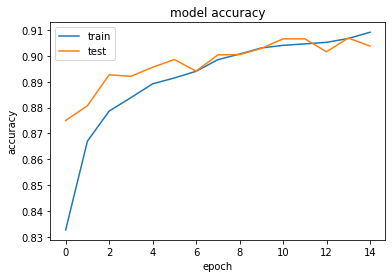

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

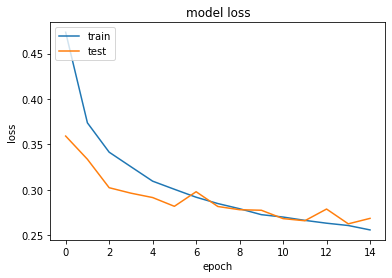

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#changing activation functions gelu - relu -softmax
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='gelu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='gelu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='gelu'))
model.add(Flatten())
model.add(Dense(64, activation='gelu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4790 - accuracy: 0.8294 - val_loss: 0.3425 - val_accuracy: 0.8786
Epoch 2/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3467 - accuracy: 0.8764 - val_loss: 0.3064 - val_accuracy: 0.8905
Epoch 3/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3125 - accuracy: 0.8869 - val_loss: 0.2925 - val_accuracy: 0.8930
Epoch 4/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2902 - accuracy: 0.8944 - val_loss: 0.2782 - val_accuracy: 0.8995
Epoch 5/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2737 - accuracy: 0.9025 - val_loss: 0.2782 - val_accuracy: 0.9009
Epoch 6/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2595 - accuracy: 0.9070 - val_loss: 0.2636 - val_accuracy: 0.9079
Epoch 7/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2508 - accuracy: 0.9092 - val_loss: 0.2646 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.32999777793884


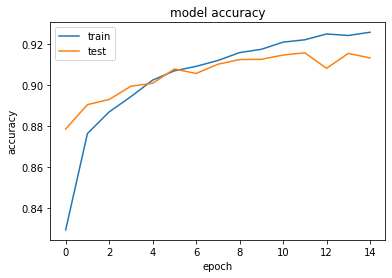

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

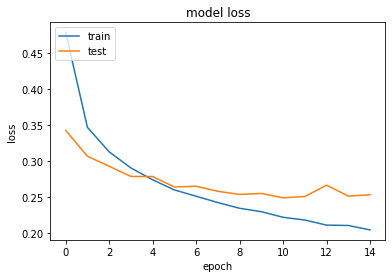

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Changing Optimizers**


Optimizers are algorithms or methods used to change the attributes of the neural network such as weights and learning rate to reduce the losses and increase the overall accuracy.

SGD:

Stochastic Gradient Descent This optimization algorithm is a further extension of mini stochastic gradient descent to update network weights during training. SGD is the most basic form of Gradient Descent, it subtracts the gradient by multiplying the learning rate from the weights. 


RMSprop:

The RMSprop optimizer is similar to the gradient descent algorithm but with momentum. The RMSprop optimizer restricts the oscillations in the vertical direction. By which we can increase our learning rate, weights and our algorithm could take larger steps in the horizontal direction converging faster.



AdaDelta:

Adadelta is a more robust extension of Adagrad that adapts learning rates based on a moving window of gradient updates, instead of accumulating all past gradients. This way, Adadelta continues learning even when many updates have been done.






In [ ]:
#changing optimizer to SGD
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'SGD', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 42s 22ms/step - loss: 0.8744 - accuracy: 0.6825 - val_loss: 0.5710 - val_accuracy: 0.7839
Epoch 2/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.6106 - accuracy: 0.7745 - val_loss: 0.5094 - val_accuracy: 0.8150
Epoch 3/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.5431 - accuracy: 0.8049 - val_loss: 0.4635 - val_accuracy: 0.8328
Epoch 4/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.5036 - accuracy: 0.8192 - val_loss: 0.4354 - val_accuracy: 0.8427
Epoch 5/15
1875/1875 [==============================] - 43s 23ms/step - loss: 0.4760 - accuracy: 0.8309 - val_loss: 0.4170 - val_accuracy: 0.8525
Epoch 6/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4546 - accuracy: 0.8409 - val_loss: 0.3941 - val_accuracy: 0.8606
Epoch 7/15
1875/1875 [==============================] - 41s 22ms/step - loss: 0.4386 - accuracy: 0.8459 - val_loss: 0.3859 -

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 88.35999965667725


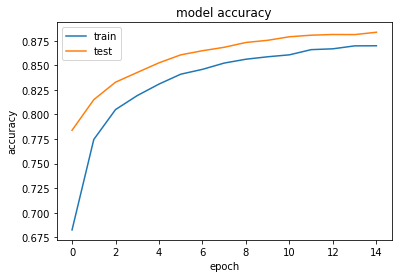

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

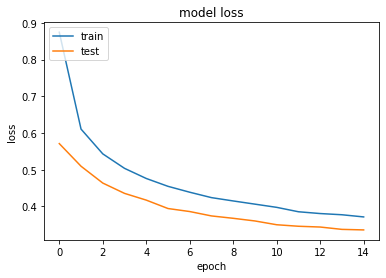

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#changing optimizer to RMSprop
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'RMSprop', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4966 - accuracy: 0.8273 - val_loss: 0.3603 - val_accuracy: 0.8727
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3816 - accuracy: 0.8669 - val_loss: 0.3494 - val_accuracy: 0.8769
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3711 - accuracy: 0.8735 - val_loss: 0.3413 - val_accuracy: 0.8792
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3697 - accuracy: 0.8745 - val_loss: 0.3639 - val_accuracy: 0.8763
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3750 - accuracy: 0.8726 - val_loss: 0.3605 - val_accuracy: 0.8729
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3759 - accuracy: 0.8730 - val_loss: 0.3431 - val_accuracy: 0.8812
Epoch 7/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3826 - accuracy: 0.8729 - val_loss: 0.3482 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 87.69999742507935


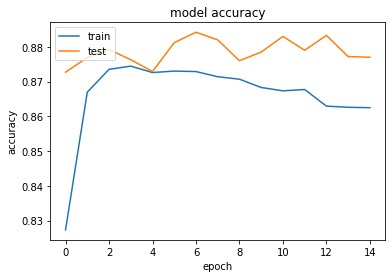

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

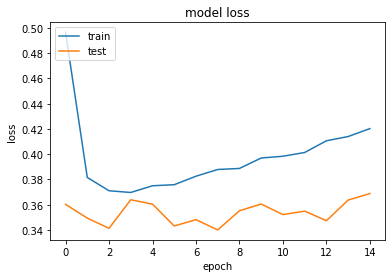

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#changing optimizer to Adadelta
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'Adadelta', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 2.2323 - accuracy: 0.1922 - val_loss: 2.0910 - val_accuracy: 0.4988
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 2.0313 - accuracy: 0.3473 - val_loss: 1.8610 - val_accuracy: 0.5356
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.8247 - accuracy: 0.4313 - val_loss: 1.6340 - val_accuracy: 0.5576
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6371 - accuracy: 0.4738 - val_loss: 1.4488 - val_accuracy: 0.5680
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4904 - accuracy: 0.5046 - val_loss: 1.3100 - val_accuracy: 0.5961
Epoch 6/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.3815 - accuracy: 0.5296 - val_loss: 1.2048 - val_accuracy: 0.6229
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 1.2932 - accuracy: 0.5496 - val_loss: 1.1227 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 71.66000008583069


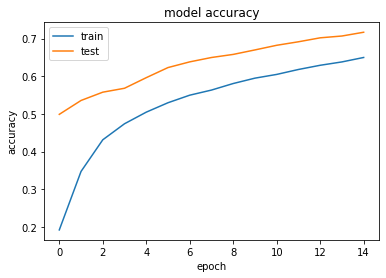

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

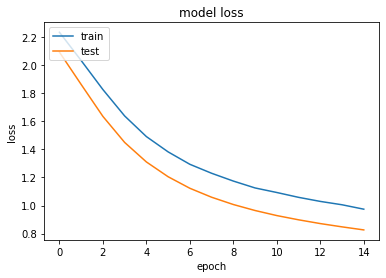

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Adding Initializers**
>

Kernel Weight initialization is a procedure of setting the weights of a neural network to small random values that defines the starting point for the optimization (learning or training) of the neural network model. The neurons in neural networks are composed of hyper parameters referred to as weights which are used to calculate a weighted sum of the inputs from the last output layer.

Glorot Normal:

Glorot Normal initialization is the method which generate the initial value from Gaussian distribution. Each layer has different std value of Gaussian distribution depends on the number of input units and output units


Glorot Uniform: 

Glorot Uniform initialization is the default kernel initializer which is initiated by taking samples from a normal distribution centered to a limited value of [0,0] or [limit, -limit].


In [ ]:
#Adding initializers Glorot Normal
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='GlorotNormal'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4878 - accuracy: 0.8281 - val_loss: 0.3348 - val_accuracy: 0.8815
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3582 - accuracy: 0.8740 - val_loss: 0.3107 - val_accuracy: 0.8905
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3263 - accuracy: 0.8840 - val_loss: 0.2959 - val_accuracy: 0.8933
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3062 - accuracy: 0.8907 - val_loss: 0.2835 - val_accuracy: 0.8972
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2911 - accuracy: 0.8949 - val_loss: 0.2703 - val_accuracy: 0.9034
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2809 - accuracy: 0.8989 - val_loss: 0.2690 - val_accuracy: 0.9029
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2694 - accuracy: 0.9031 - val_loss: 0.2811 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.22999906539917


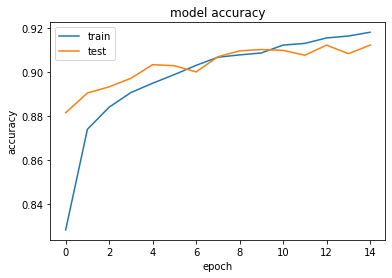

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

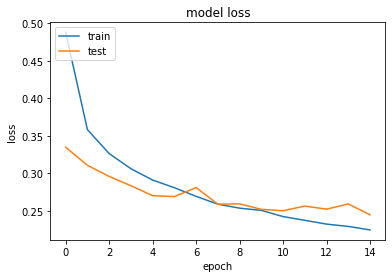

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Adding initializers Glorot Uniform
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='GlorotUniform'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5036 - accuracy: 0.8224 - val_loss: 0.3502 - val_accuracy: 0.8765
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3672 - accuracy: 0.8692 - val_loss: 0.3119 - val_accuracy: 0.8867
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3366 - accuracy: 0.8789 - val_loss: 0.2968 - val_accuracy: 0.8928
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3172 - accuracy: 0.8859 - val_loss: 0.2859 - val_accuracy: 0.8987
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2986 - accuracy: 0.8925 - val_loss: 0.2854 - val_accuracy: 0.8962
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2874 - accuracy: 0.8965 - val_loss: 0.2756 - val_accuracy: 0.9010
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2744 - accuracy: 0.8992 - val_loss: 0.2642 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.14000201225281


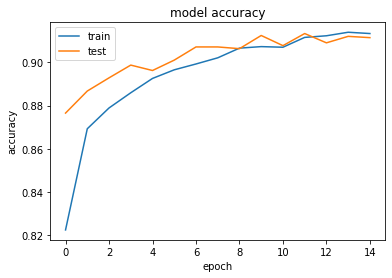

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

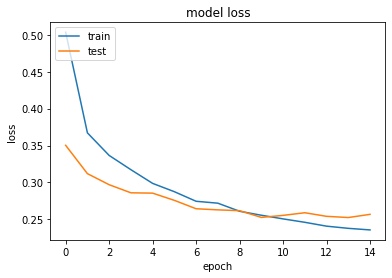

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Adding initializers RandomNormal 
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='RandomNormal'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4906 - accuracy: 0.8258 - val_loss: 0.3412 - val_accuracy: 0.8760
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3577 - accuracy: 0.8720 - val_loss: 0.3033 - val_accuracy: 0.8906
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3226 - accuracy: 0.8835 - val_loss: 0.2895 - val_accuracy: 0.8954
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3024 - accuracy: 0.8918 - val_loss: 0.2761 - val_accuracy: 0.9000
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2881 - accuracy: 0.8964 - val_loss: 0.2629 - val_accuracy: 0.9054
Epoch 6/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2772 - accuracy: 0.8986 - val_loss: 0.2625 - val_accuracy: 0.9029
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2661 - accuracy: 0.9039 - val_loss: 0.2570 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.54000282287598


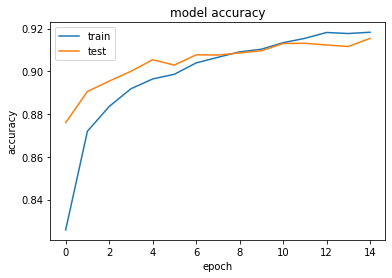

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

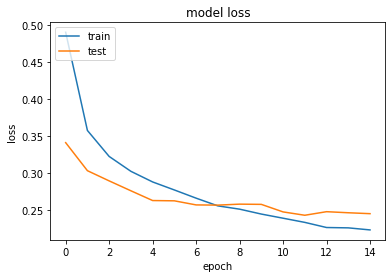

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Tunning Maxpool and Padding**

>

Maxpool Layer: 

Max pooling is a pooling operation that selects the maximum element from the region of the feature map covered by the filter. Thus, the output after max-pooling layer would be a feature map containing the most prominent features of the previous feature map.



Padding:

Padding is a term relevant to convolutional neural networks as it refers to the amount of pixels added to an image when it is being processed by the kernel of a CNN.

In [ ]:
#Changing padding and maxpool values to same
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001),padding="same"))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4903 - accuracy: 0.8274 - val_loss: 0.3623 - val_accuracy: 0.8671
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3598 - accuracy: 0.8725 - val_loss: 0.3112 - val_accuracy: 0.8915
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3263 - accuracy: 0.8843 - val_loss: 0.2937 - val_accuracy: 0.8942
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3082 - accuracy: 0.8891 - val_loss: 0.2788 - val_accuracy: 0.8990
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2900 - accuracy: 0.8949 - val_loss: 0.2755 - val_accuracy: 0.9000
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2775 - accuracy: 0.8992 - val_loss: 0.2658 - val_accuracy: 0.9059
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2677 - accuracy: 0.9037 - val_loss: 0.2681 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.39000177383423


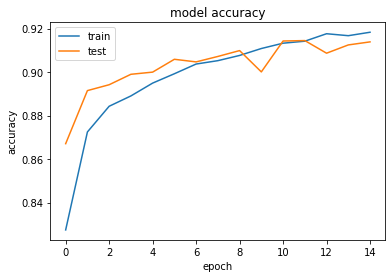

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

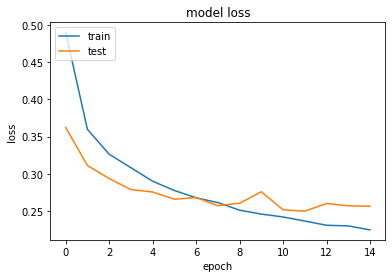

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Changing padding and maxpool values to valid
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001),padding="valid"))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="valid"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.4843 - accuracy: 0.8296 - val_loss: 0.3339 - val_accuracy: 0.8822
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3548 - accuracy: 0.8742 - val_loss: 0.3160 - val_accuracy: 0.8855
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3262 - accuracy: 0.8835 - val_loss: 0.2953 - val_accuracy: 0.8918
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3033 - accuracy: 0.8922 - val_loss: 0.2857 - val_accuracy: 0.8979
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2889 - accuracy: 0.8966 - val_loss: 0.2727 - val_accuracy: 0.9020
Epoch 6/15
1875/1875 [==============================] - 10s 6ms/step - loss: 0.2795 - accuracy: 0.8998 - val_loss: 0.2704 - val_accuracy: 0.9005
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2710 - accuracy: 0.9025 - val_loss: 0.2656 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.430002450943


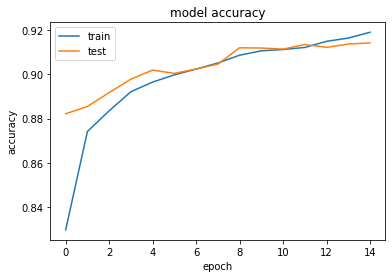

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

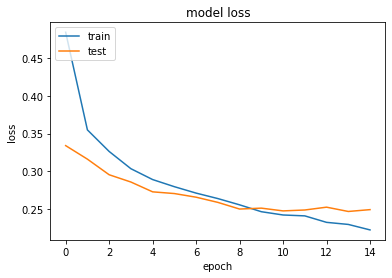

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Changing padding and maxpool values to same and valid
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001),padding="same"))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="valid"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4687 - accuracy: 0.8351 - val_loss: 0.3495 - val_accuracy: 0.8687
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3467 - accuracy: 0.8755 - val_loss: 0.3011 - val_accuracy: 0.8913
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3163 - accuracy: 0.8870 - val_loss: 0.2951 - val_accuracy: 0.8937
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2976 - accuracy: 0.8933 - val_loss: 0.2935 - val_accuracy: 0.8913
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2837 - accuracy: 0.8964 - val_loss: 0.2752 - val_accuracy: 0.9033
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2726 - accuracy: 0.9016 - val_loss: 0.2650 - val_accuracy: 0.9066
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2630 - accuracy: 0.9046 - val_loss: 0.2718 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.28999710083008


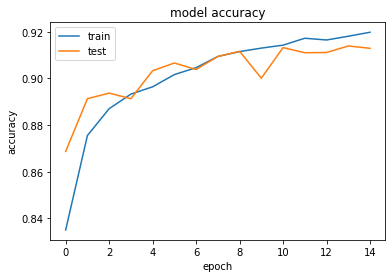

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

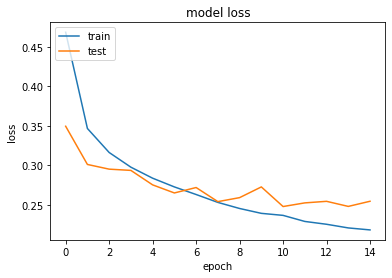

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Changing Kernel Size**

>

Increasing kernel size for the CNN model will effectively increase the total number of parameters. So, it is given that the model wil have a higher complexity to address a given problem thus the model can perform well when given a complex problem and the input and output values will be limited with respect to the kernl size. here we used (3,3) kernel size to limit the number of parameters and unrelated features.

In [ ]:
#Changing kernel size to (1, 1)
model = Sequential()
model.add(Conv2D(32, (1, 1),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001),padding="same"))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6599 - accuracy: 0.7579 - val_loss: 0.4836 - val_accuracy: 0.8161
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5187 - accuracy: 0.8097 - val_loss: 0.4406 - val_accuracy: 0.8399
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4915 - accuracy: 0.8191 - val_loss: 0.4256 - val_accuracy: 0.8395
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4717 - accuracy: 0.8267 - val_loss: 0.4233 - val_accuracy: 0.8443
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4570 - accuracy: 0.8307 - val_loss: 0.4092 - val_accuracy: 0.8473
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4497 - accuracy: 0.8342 - val_loss: 0.4055 - val_accuracy: 0.8508
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4409 - accuracy: 0.8375 - val_loss: 0.3877 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 86.16999983787537


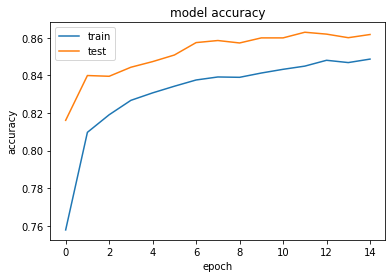

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

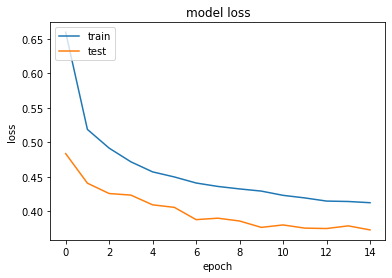

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Changing kernel size to (2, 2)
model = Sequential()
model.add(Conv2D(32, (2, 2),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001),padding="same"))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4807 - accuracy: 0.8306 - val_loss: 0.3533 - val_accuracy: 0.8721
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3562 - accuracy: 0.8738 - val_loss: 0.3076 - val_accuracy: 0.8876
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3254 - accuracy: 0.8840 - val_loss: 0.2912 - val_accuracy: 0.8961
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3068 - accuracy: 0.8914 - val_loss: 0.2826 - val_accuracy: 0.8973
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2943 - accuracy: 0.8950 - val_loss: 0.2749 - val_accuracy: 0.9016
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2812 - accuracy: 0.8985 - val_loss: 0.2805 - val_accuracy: 0.8997
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2712 - accuracy: 0.9024 - val_loss: 0.2624 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.42000079154968


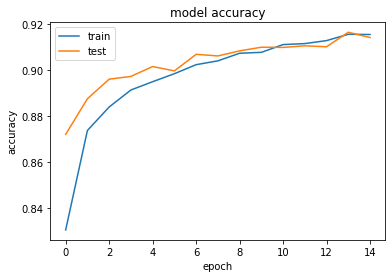

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

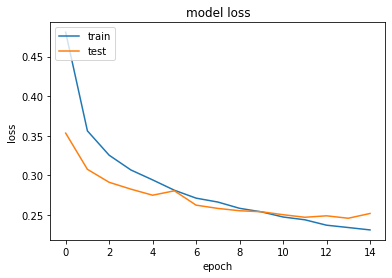

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Changing kernel size to (4, 4)
model = Sequential()
model.add(Conv2D(32, (4, 4),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001),padding="same"))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4817 - accuracy: 0.8299 - val_loss: 0.3295 - val_accuracy: 0.8795
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3521 - accuracy: 0.8751 - val_loss: 0.3107 - val_accuracy: 0.8856
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3220 - accuracy: 0.8839 - val_loss: 0.2839 - val_accuracy: 0.8964
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3021 - accuracy: 0.8917 - val_loss: 0.2752 - val_accuracy: 0.9015
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2873 - accuracy: 0.8972 - val_loss: 0.2744 - val_accuracy: 0.8991
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2753 - accuracy: 0.9007 - val_loss: 0.2637 - val_accuracy: 0.9046
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2655 - accuracy: 0.9030 - val_loss: 0.2716 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.57000184059143


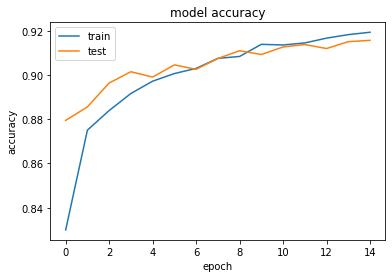

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

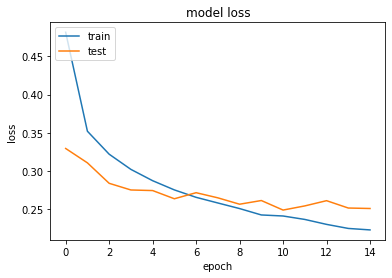

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Overfitting Problem**

>
Overfitting of the model is a common problem for a neural network model. it happens when the dataset contains a large amount of data during preprocessing. In order to stop overfitting we use Earlystopping to prevent excessive data from entering into X_test or training_labels.
and training_labels.


In [ ]:
#Earlystopping Method

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001),padding="same"))
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4821 - accuracy: 0.8299 - val_loss: 0.3387 - val_accuracy: 0.8797
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3563 - accuracy: 0.8734 - val_loss: 0.3083 - val_accuracy: 0.8901
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3246 - accuracy: 0.8834 - val_loss: 0.2989 - val_accuracy: 0.8930
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3033 - accuracy: 0.8924 - val_loss: 0.2817 - val_accuracy: 0.8987
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2869 - accuracy: 0.8968 - val_loss: 0.2785 - val_accuracy: 0.8979
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2783 - accuracy: 0.9000 - val_loss: 0.2839 - val_accuracy: 0.9009
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2668 - accuracy: 0.9021 - val_loss: 0.2618 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.39000177383423


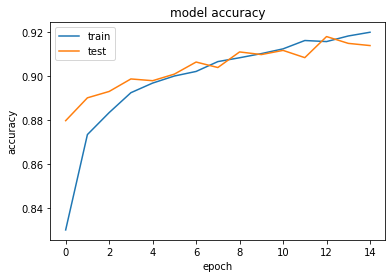

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

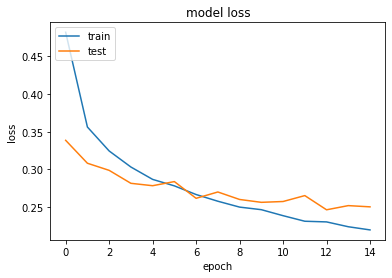

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#L1-L2 Regulazrization method

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4),padding="same"))
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 13s 6ms/step - loss: 0.4685 - accuracy: 0.8309 - val_loss: 0.3328 - val_accuracy: 0.8765
Epoch 2/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3460 - accuracy: 0.8748 - val_loss: 0.3138 - val_accuracy: 0.8826
Epoch 3/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3157 - accuracy: 0.8855 - val_loss: 0.2915 - val_accuracy: 0.8943
Epoch 4/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2974 - accuracy: 0.8903 - val_loss: 0.2816 - val_accuracy: 0.8971
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2812 - accuracy: 0.8971 - val_loss: 0.2716 - val_accuracy: 0.8996
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2712 - accuracy: 0.9007 - val_loss: 0.2650 - val_accuracy: 0.9055
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2591 - accuracy: 0.9046 - val_loss: 0.2656 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.35000109672546


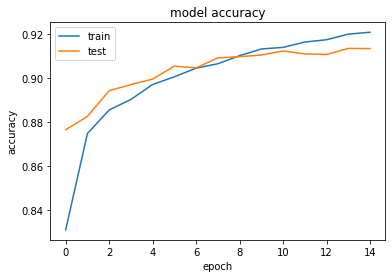

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

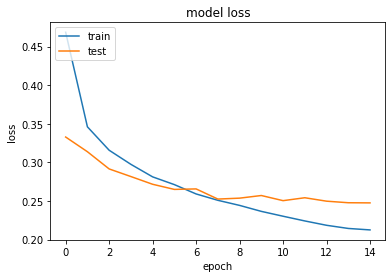

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Kfold Validation**



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import KFold
import numpy as np

In [ ]:
training_data = np.concatenate((x_train, x_test), axis=0)
testing_data = np.concatenate((y_train, y_test), axis=0)
kfold = KFold(n_splits=2, shuffle=True)
fold_no = 1
for train, test in kfold.split(training_data, testing_data):
  print(model)
  fold_no=fold_no+1
  model = Sequential()
  model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001),padding="same"))
  callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
  #model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
  model.add(Dense(512, activation='relu'))
  model.add(MaxPooling2D((2, 2),padding="same"))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
  model.add(Flatten())
  model.add(Dense(64, activation='relu'))
  model.add(Dropout(0.4))
  model.add(Dense(32, activation='relu'))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))

  model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

  history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

  test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
1875/1875 [==============================] - 12s 6ms/step - loss: 0.4531 - accuracy: 0.8402 - val_loss: 0.3516 - val_accuracy: 0.8694
Epoch 2/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3130 - accuracy: 0.8874 - val_loss: 0.2853 - val_accuracy: 0.8935
Epoch 3/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2761 - accuracy: 0.8995 - val_loss: 0.2752 - val_accuracy: 0.8974
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2498 - accuracy: 0.9078 - val_loss: 0.2602 - val_accuracy: 0.9020
Epoch 5/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2306 - accuracy: 0.9161 - val_loss: 0.2478 - val_accuracy: 0.9061
Epoch 6/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2093 - accuracy: 0.9219 - val_loss: 0.2513 - val_accuracy: 0.9105
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1940 - accuracy: 0.9272 - val_loss: 0.2422 - val_ac

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 92.11000204086304


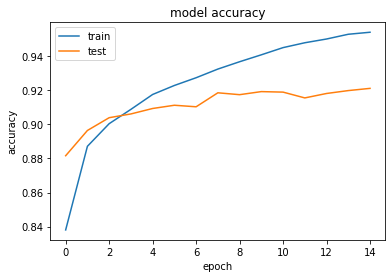

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

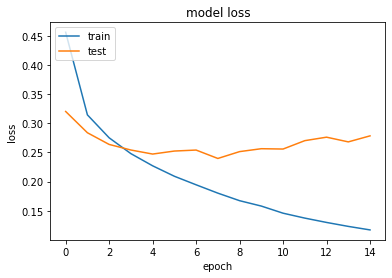

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **BEST ACCURACY MODEL**

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001),padding="same"))
#callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu',kernel_initializer='HeNormal'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=15, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/15
2143/2143 [==============================] - 25s 11ms/step - loss: 0.5774 - accuracy: 0.7957 - val_loss: 0.3684 - val_accuracy: 0.8658
Epoch 2/15
2143/2143 [==============================] - 24s 11ms/step - loss: 0.3925 - accuracy: 0.8597 - val_loss: 0.3107 - val_accuracy: 0.8871
Epoch 3/15
2143/2143 [==============================] - 23s 11ms/step - loss: 0.3445 - accuracy: 0.8766 - val_loss: 0.3018 - val_accuracy: 0.8966
Epoch 4/15
2143/2143 [==============================] - 23s 11ms/step - loss: 0.3159 - accuracy: 0.8874 - val_loss: 0.2584 - val_accuracy: 0.9081
Epoch 5/15
2143/2143 [==============================] - 23s 11ms/step - loss: 0.2918 - accuracy: 0.8954 - val_loss: 0.2633 - val_accuracy: 0.9108
Epoch 6/15
2143/2143 [==============================] - 23s 11ms/step - loss: 0.2747 - accuracy: 0.9014 - val_loss: 0.2734 - val_accuracy: 0.9097
Epoch 7/15
2143/2143 [==============================] - 23s 11ms/step - loss: 0.2609 - accuracy: 0.9070 - val_loss: 0.2633 -

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 92.0199990272522


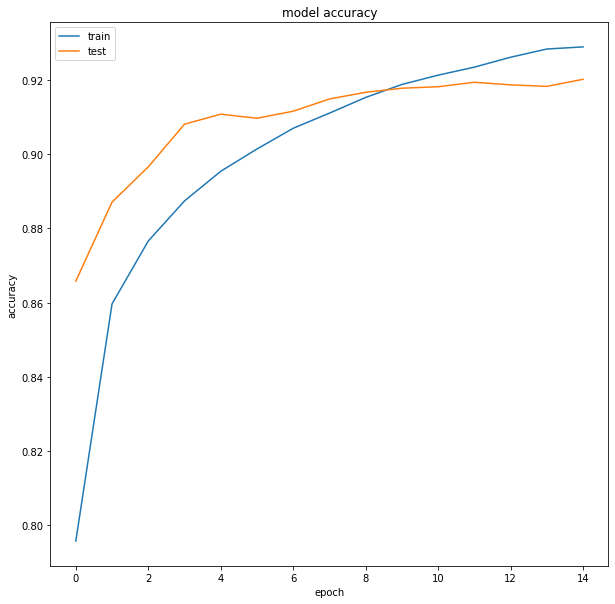

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

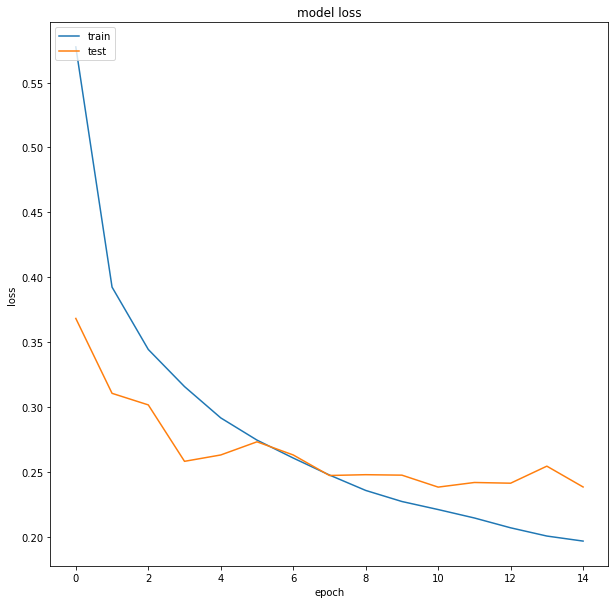

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

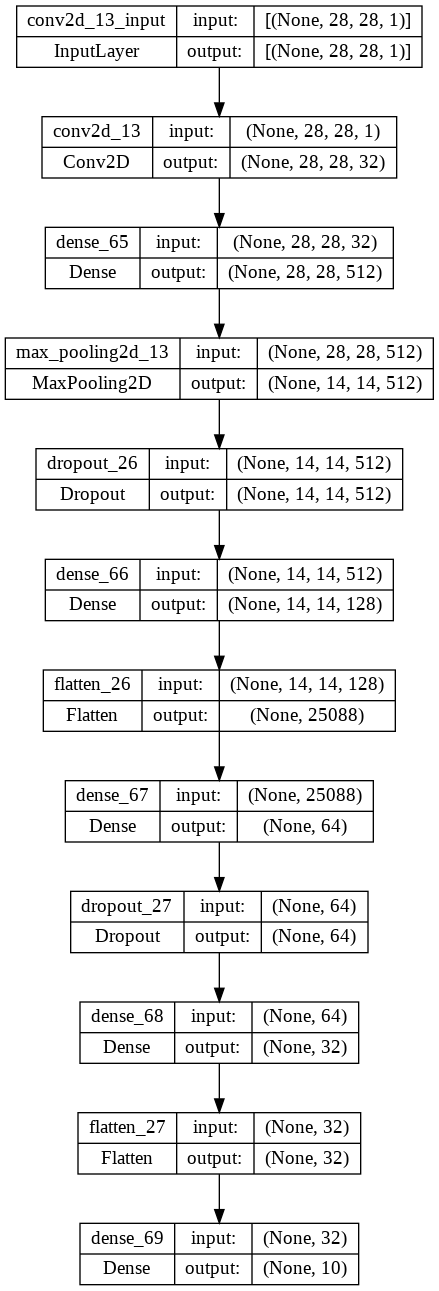

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 dense_65 (Dense)            (None, 28, 28, 512)       16896     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 512)      0         
 g2D)                                                            
                                                                 
 dropout_26 (Dropout)        (None, 14, 14, 512)       0         
                                                                 
 dense_66 (Dense)            (None, 14, 14, 128)       65664     
                                                                 
 flatten_26 (Flatten)        (None, 25088)             0         
                                                     

# **MNIST**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.regularizers import l2
from keras.layers import Dropout
from keras import regularizers
from collections import Counter

In [ ]:
from keras.datasets import mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#print(x_train[0])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train_n = x_train.astype('float32')
x_test_n = x_test.astype('float32')
x_train_norm = x_train_n / 255.0
x_test_norm = x_test_n / 255.0

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=5, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/5
2143/2143 [==============================] - 27s 12ms/step - loss: 0.3641 - accuracy: 0.8859 - val_loss: 0.0803 - val_accuracy: 0.9763
Epoch 2/5
2143/2143 [==============================] - 22s 10ms/step - loss: 0.1679 - accuracy: 0.9498 - val_loss: 0.0649 - val_accuracy: 0.9813
Epoch 3/5
2143/2143 [==============================] - 21s 10ms/step - loss: 0.1333 - accuracy: 0.9603 - val_loss: 0.0569 - val_accuracy: 0.9835
Epoch 4/5
2143/2143 [==============================] - 21s 10ms/step - loss: 0.1103 - accuracy: 0.9664 - val_loss: 0.0473 - val_accuracy: 0.9860
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0446 - accuracy: 0.9872


1/1 [==============================] - 0s 16ms/step
Output Digit= 8


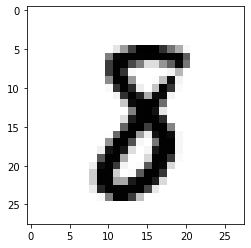

In [ ]:
import random
import numpy as np

a=np.random.randint(0, len(x_test))
plt.imshow(x_test[a].reshape(28,28),cmap='Greys')
pred=model.predict(x_test[a].reshape(1,28,28,1))
print('Output Digit=',pred.argmax())

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 98.58999848365784


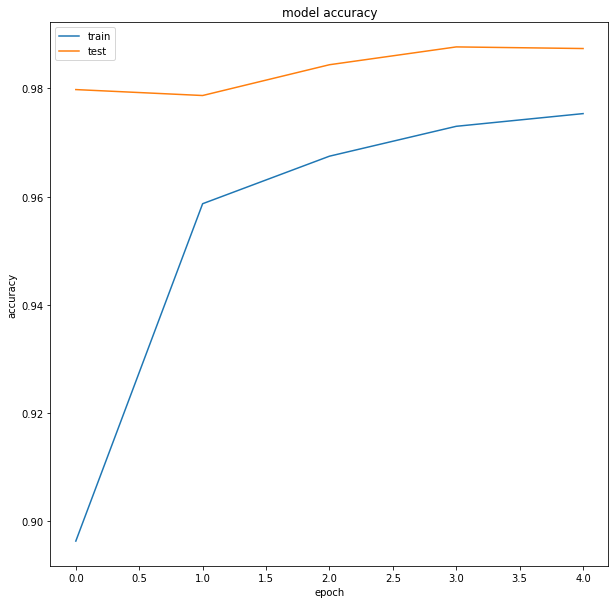

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

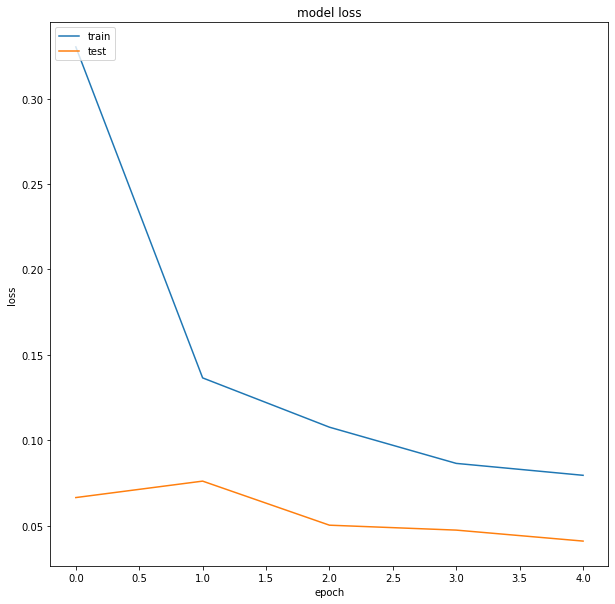

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 dense_5 (Dense)             (None, 26, 26, 512)       16896     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 512)      0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 13, 13, 512)       0         
                                                                 
 dense_6 (Dense)             (None, 13, 13, 128)       65664     
                                                                 
 flatten_2 (Flatten)         (None, 21632)             0         
                                                      

# **Data Augmentation For MNIST**

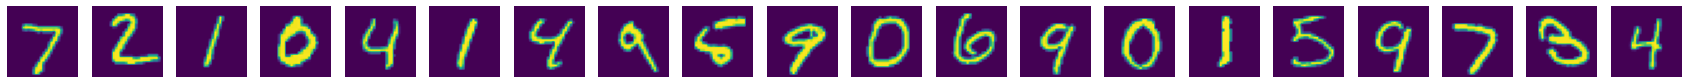

In [ ]:
plt.figure(figsize=(30,25))

for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.imshow(x_test[i])
    plt.axis('off')

plt.show()

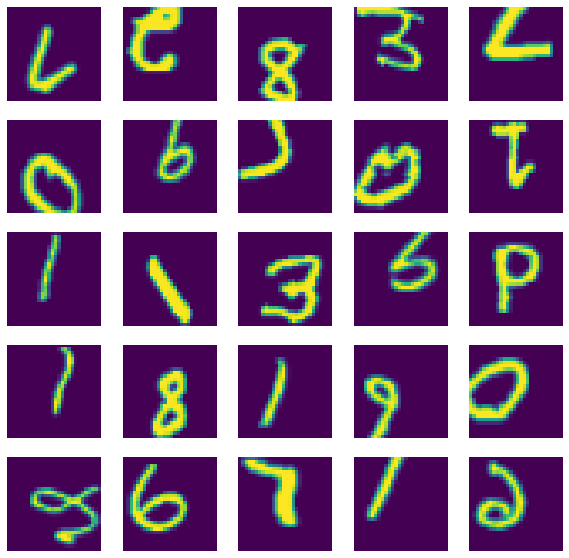

70000 images have been Flipped and adjusted to desired height


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Data Augmentation Filters----Flipping, Height Adjustment

data_augmentor = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2)
data_augmentor.fit(X_train)

#random image selection and generation

augment = data_augmentor.flow(X_train[:], batch_size=1)
for i in range(25):
  pyplot.subplot(5,5,1 + i)

  pyplot.axis('off')
  pyplot.imshow(augment.next().squeeze())
#pyplot.figure(figsize=(10,10), dpi=150)

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
pyplot.show()
count_train=0
count_test=0
total_dataset_1=1
for i in range(0, len(X_train)):
  count_train+=1
#print(count_train)
for j in range(0, len(X_test)):
  count_test+=1
#print(count_test)
total_dataset_1=count_train+count_test
print(total_dataset_1,'images have been Flipped and adjusted to desired height')

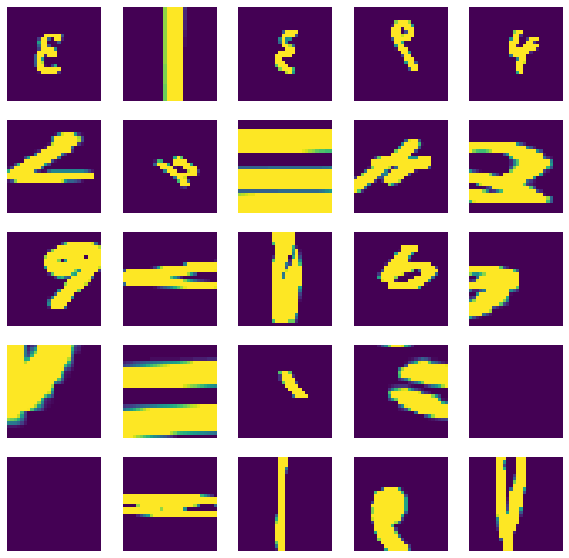

70000 images have been enlarged and iluminated


In [ ]:
#Data Augmentation Filters----Zoom, Brightness Filter
data_augmentor = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2, zoom_range=1.5, brightness_range=[5,10])
data_augmentor.fit(X_train)
augment = data_augmentor.flow(X_train[:], batch_size=1)
for i in range(25):
  pyplot.subplot(5,5,1 + i)

  pyplot.axis('off')
  pyplot.imshow(augment.next().squeeze())
#pyplot.figure(figsize=(10,10), dpi=150)
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
pyplot.show()
count_train=0
count_test=0
total_dataset_2=0
for i in range(0, len(X_train)):
  count_train+=1
#print(count_train)
for j in range(0, len(X_test)):
  count_test+=1
#print(count_test)
total_dataset_2=count_train+count_test
print(total_dataset_2,'images have been enlarged and iluminated')

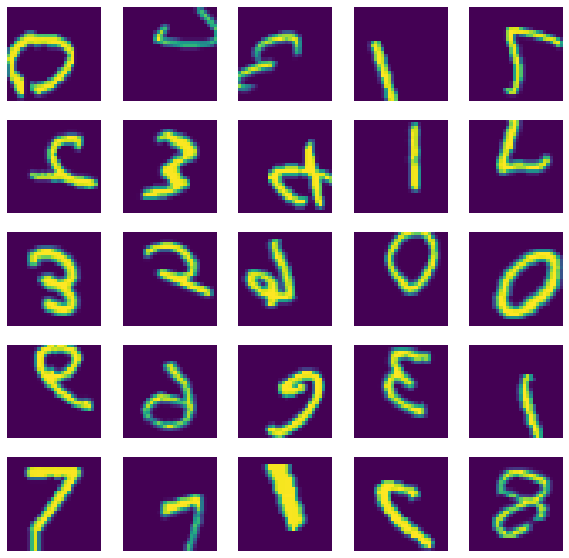

70000 images have been Rescaled


In [ ]:
#Data Augmentation Filters----Rescale Filter
data_augmentor = ImageDataGenerator(rescale=1./255,horizontal_flip=True, vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2)
data_augmentor.fit(X_train)
augment = data_augmentor.flow(X_train[:], batch_size=1)
for i in range(25):
  pyplot.subplot(5,5,1 + i)

  pyplot.axis('off')
  pyplot.imshow(augment.next().squeeze())
#pyplot.figure(figsize=(10,10), dpi=150)
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
pyplot.show()
count_train=0
count_test=0
total_dataset_3=0
for i in range(0, len(X_train)):
  count_train+=1
#print(count_train)
for j in range(0, len(X_test)):
  count_test+=1
#print(count_test)
total_dataset_3=count_train+count_test
print(total_dataset_3,'images have been Rescaled')

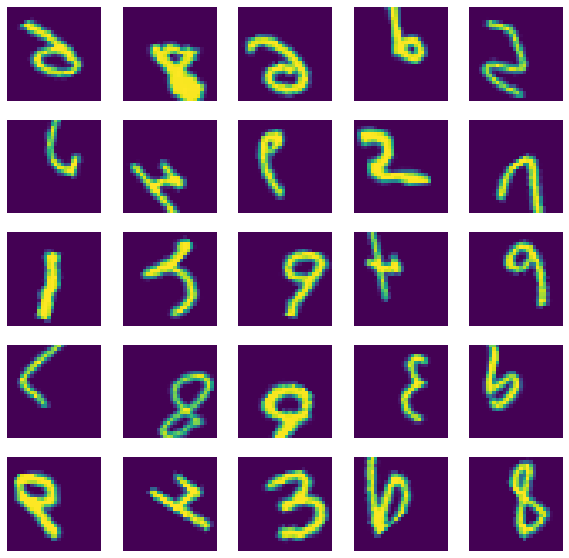

70000 images have been rotated to 45 degrees


In [ ]:
#Data Augmentation Filters----Rotation Filter
data_augmentor = ImageDataGenerator(rotation_range=45,horizontal_flip=True, vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2)
data_augmentor.fit(X_train)
augment = data_augmentor.flow(X_train[:], batch_size=1)
for i in range(25):
  pyplot.subplot(5,5,1 + i)

  pyplot.axis('off')
  pyplot.imshow(augment.next().squeeze())
#pyplot.figure(figsize=(10,10), dpi=150)
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
pyplot.show()
count_train=0
count_test=0
total_dataset_4=0
for i in range(0, len(X_train)):
  count_train+=1
#print(count_train)
for j in range(0, len(X_test)):
  count_test+=1
#print(count_test)
total_dataset_4=count_train+count_test
print(total_dataset_4,'images have been rotated to 45 degrees')

In [ ]:
Final_increased_dataset=0
Final_increased_dataset=total_dataset_1+total_dataset_2+total_dataset_3+total_dataset_4
print(Final_increased_dataset)

280000


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=5, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3302 - accuracy: 0.8962 - val_loss: 0.0665 - val_accuracy: 0.9798
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1365 - accuracy: 0.9587 - val_loss: 0.0761 - val_accuracy: 0.9787
Epoch 3/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1077 - accuracy: 0.9675 - val_loss: 0.0504 - val_accuracy: 0.9844
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0865 - accuracy: 0.9730 - val_loss: 0.0475 - val_accuracy: 0.9877
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.0411 - accuracy: 0.9874


In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 98.73999953269958


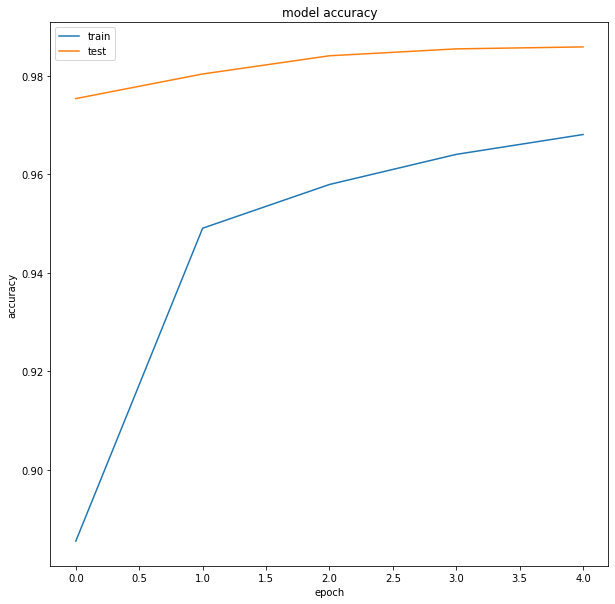

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

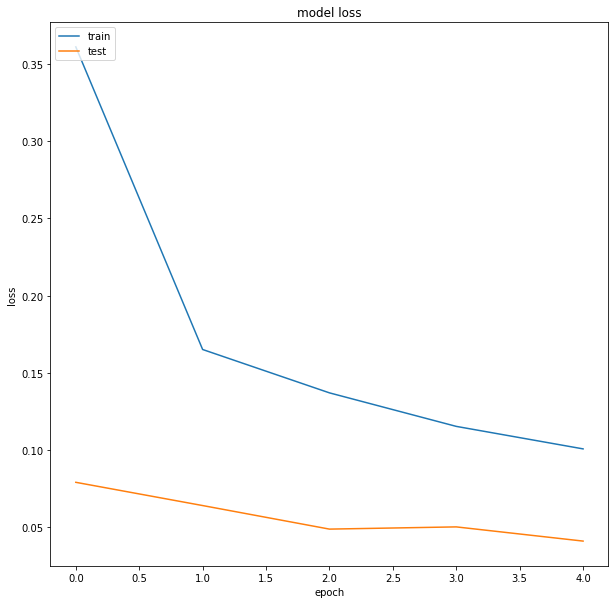

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Fashion MNIST**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.regularizers import l2
from keras.layers import Dropout
from keras import regularizers
from collections import Counter

In [ ]:
from keras.datasets import fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#print(x_train[0])

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [ ]:
x_train_n = x_train.astype('float32')
x_test_n = x_test.astype('float32')
x_train_norm = x_train_n / 255.0
x_test_norm = x_test_n / 255.0

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=5, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/5
2143/2143 [==============================] - 21s 10ms/step - loss: 0.6667 - accuracy: 0.7542 - val_loss: 0.4115 - val_accuracy: 0.8515
Epoch 2/5
2143/2143 [==============================] - 21s 10ms/step - loss: 0.4435 - accuracy: 0.8388 - val_loss: 0.3500 - val_accuracy: 0.8749
Epoch 3/5
2143/2143 [==============================] - 21s 10ms/step - loss: 0.3876 - accuracy: 0.8588 - val_loss: 0.3075 - val_accuracy: 0.8909
Epoch 4/5
2143/2143 [==============================] - 20s 10ms/step - loss: 0.3542 - accuracy: 0.8727 - val_loss: 0.3070 - val_accuracy: 0.8927
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.2882 - accuracy: 0.8999


1/1 [==============================] - 0s 15ms/step
output= 3


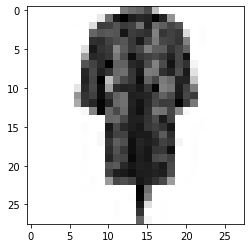

In [ ]:
import random
import numpy as np

a=np.random.randint(0, len(x_test))
plt.imshow(x_test[a].reshape(28,28),cmap='Greys')
pred=model.predict(x_test[a].reshape(1,28,28,1))
print('output=',pred.argmax())

fashion_class={
    0:"T-shirt/top",
    1:"Trouser",
    2:"Pullover",
    3:"Dress",
    4:"Coat",
    5:"Sandal",
    6:"Shirt",
    7:"Sneaker",
    8:"Bag",
    9:"Ankle boot"
}

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 89.99000191688538


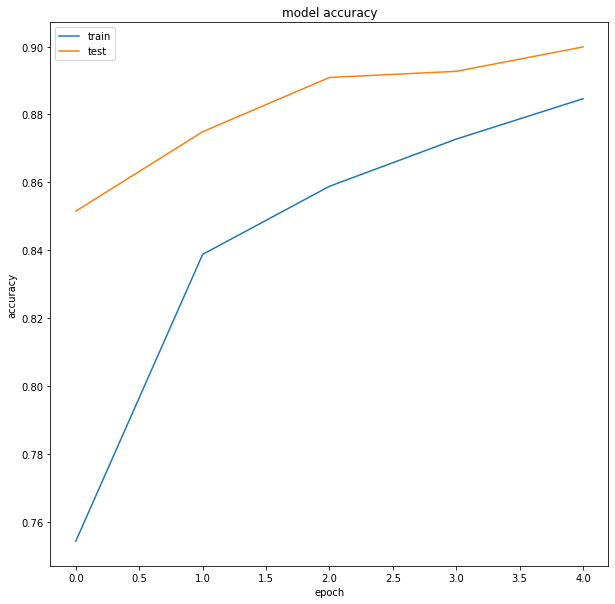

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

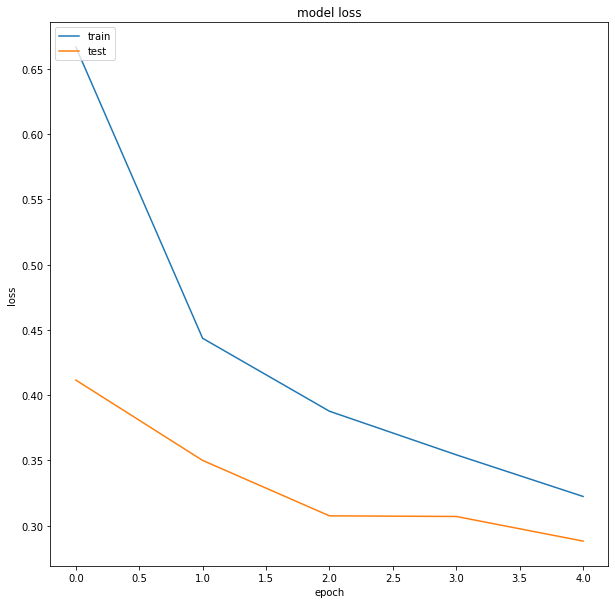

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 dense (Dense)               (None, 26, 26, 512)       16896     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 512)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 13, 13, 512)       0         
                                                                 
 dense_1 (Dense)             (None, 13, 13, 128)       65664     
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                        

# **Data Augmentation for Fashion_MNIST**

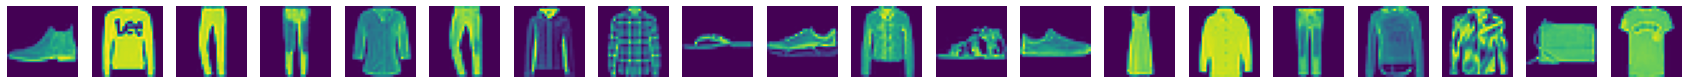

In [ ]:
plt.figure(figsize=(30,25))

for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.imshow(x_test[i])
    plt.axis('off')

plt.show()

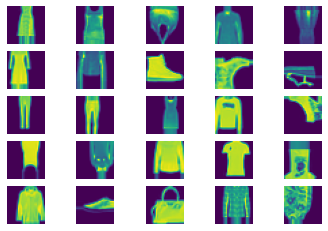

70000 images have been Flipped and adjusted to desired height


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Data Augmentation Filters----Flipping, Height Adjustment

data_augmentor = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2)
data_augmentor.fit(X_train)

#random image selection and generation

augment = data_augmentor.flow(X_train[:], batch_size=1)
for i in range(25):
  pyplot.subplot(5,5,1 + i)

  pyplot.axis('off')
  pyplot.imshow(augment.next().squeeze())
#pyplot.figure(figsize=(10,10), dpi=150)

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
pyplot.show()
count_train=0
count_test=0
total_dataset_1=1
for i in range(0, len(X_train)):
  count_train+=1
#print(count_train)
for j in range(0, len(X_test)):
  count_test+=1
#print(count_test)
total_dataset_1=count_train+count_test
print(total_dataset_1,'images have been Flipped and adjusted to desired height')

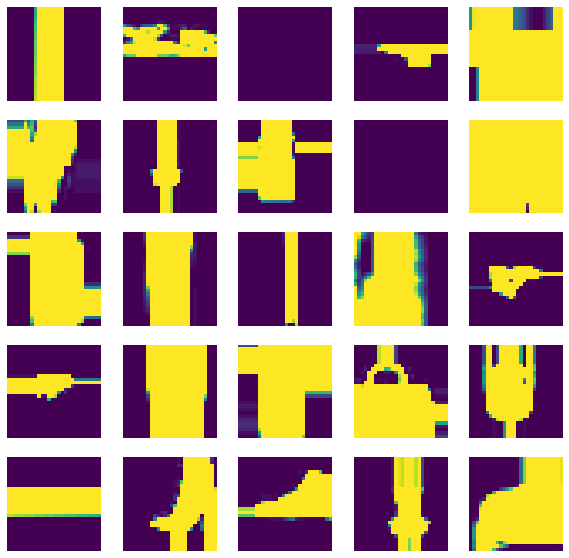

70000 images have been enlarged and iluminated


In [ ]:
#Data Augmentation Filters----Zoom, Brightness Filter
data_augmentor = ImageDataGenerator(horizontal_flip=True, vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2, zoom_range=1.5, brightness_range=[5,10])
data_augmentor.fit(X_train)
augment = data_augmentor.flow(X_train[:], batch_size=1)
for i in range(25):
  pyplot.subplot(5,5,1 + i)

  pyplot.axis('off')
  pyplot.imshow(augment.next().squeeze())
#pyplot.figure(figsize=(10,10), dpi=150)
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
pyplot.show()
count_train=0
count_test=0
total_dataset_2=0
for i in range(0, len(X_train)):
  count_train+=1
#print(count_train)
for j in range(0, len(X_test)):
  count_test+=1
#print(count_test)
total_dataset_2=count_train+count_test
print(total_dataset_2,'images have been enlarged and iluminated')

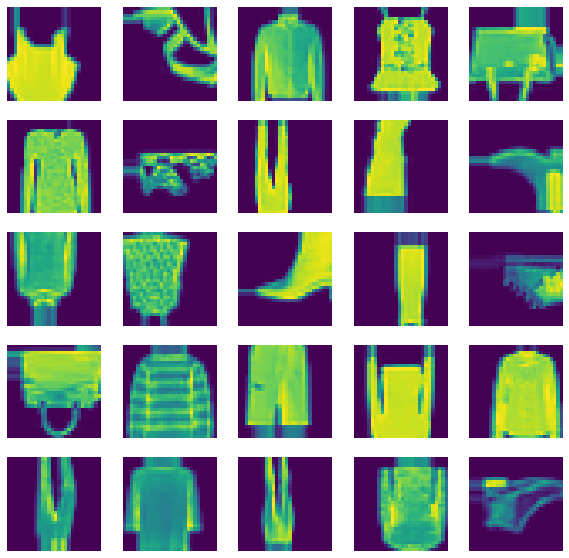

70000 images have been Rescaled


In [ ]:
#Data Augmentation Filters----Rescale Filter
data_augmentor = ImageDataGenerator(rescale=1./255,horizontal_flip=True, vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2)
data_augmentor.fit(X_train)
augment = data_augmentor.flow(X_train[:], batch_size=1)
for i in range(25):
  pyplot.subplot(5,5,1 + i)

  pyplot.axis('off')
  pyplot.imshow(augment.next().squeeze())
#pyplot.figure(figsize=(10,10), dpi=150)
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
pyplot.show()
count_train=0
count_test=0
total_dataset_3=0
for i in range(0, len(X_train)):
  count_train+=1
#print(count_train)
for j in range(0, len(X_test)):
  count_test+=1
#print(count_test)
total_dataset_3=count_train+count_test
print(total_dataset_3,'images have been Rescaled')

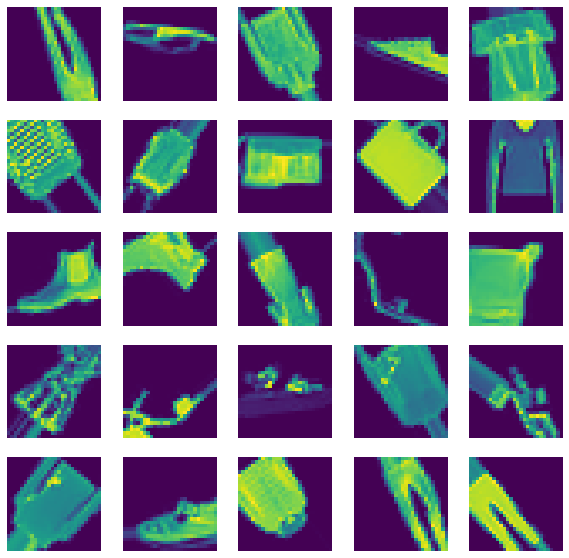

70000 images have been rotated to 45 degrees


In [ ]:
#Data Augmentation Filters----Rotation Filter
data_augmentor = ImageDataGenerator(rotation_range=45,horizontal_flip=True, vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2)
data_augmentor.fit(X_train)
augment = data_augmentor.flow(X_train[:], batch_size=1)
for i in range(25):
  pyplot.subplot(5,5,1 + i)

  pyplot.axis('off')
  pyplot.imshow(augment.next().squeeze())
#pyplot.figure(figsize=(10,10), dpi=150)
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
pyplot.show()
count_train=0
count_test=0
total_dataset_4=0
for i in range(0, len(X_train)):
  count_train+=1
#print(count_train)
for j in range(0, len(X_test)):
  count_test+=1
#print(count_test)
total_dataset_4=count_train+count_test
print(total_dataset_4,'images have been rotated to 45 degrees')

In [ ]:
Final_increased_dataset=0
Final_increased_dataset=total_dataset_1+total_dataset_2+total_dataset_3+total_dataset_4
print(Final_increased_dataset)

280000


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1),kernel_regularizer=l2(0.001)))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=5, batch_size=32, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.5904 - accuracy: 0.7873 - val_loss: 0.3511 - val_accuracy: 0.8742
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.3951 - accuracy: 0.8588 - val_loss: 0.2964 - val_accuracy: 0.8926
Epoch 3/5
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3399 - accuracy: 0.8778 - val_loss: 0.2770 - val_accuracy: 0.9019
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.3078 - accuracy: 0.8878 - val_loss: 0.2621 - val_accuracy: 0.9035
Epoch 5/5
313/313 [==============================] - 2s 5ms/step - loss: 0.2484 - accuracy: 0.9121


In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 91.21000170707703


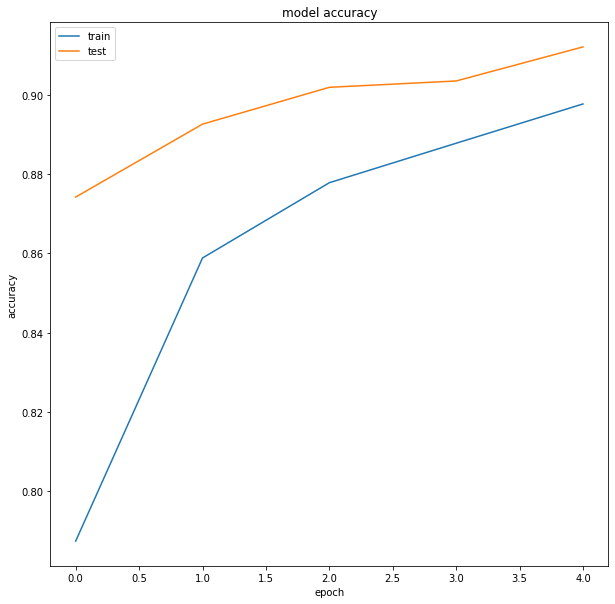

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

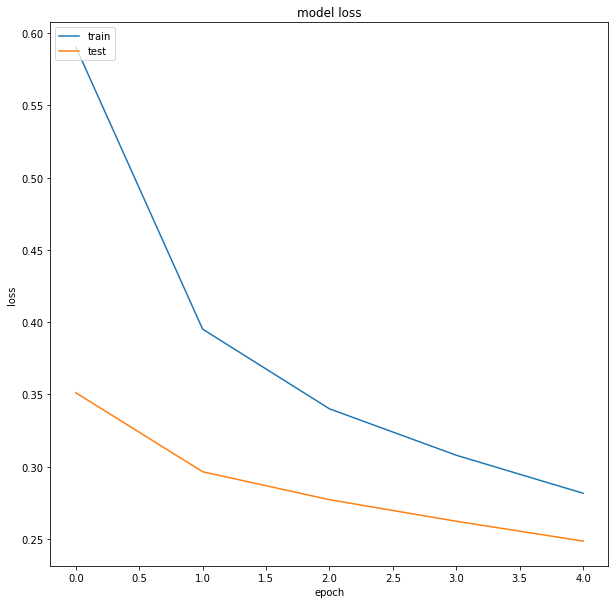

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **CIFAR10**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot
import matplotlib.pyplot as plt
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.regularizers import l2
from keras.layers import Dropout
from keras import regularizers
from collections import Counter

In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
#print(x_train[0])

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [ ]:
x_train_n = x_train.astype('float32')
x_test_n = x_test.astype('float32')
x_train_norm = x_train_n / 255.0
x_test_norm = x_test_n / 255.0

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(32,32,3), kernel_regularizer=l2(0.001)))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=10, batch_size=28, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/10
1786/1786 [==============================] - 22s 12ms/step - loss: 1.7288 - accuracy: 0.3599 - val_loss: 1.3711 - val_accuracy: 0.5106
Epoch 2/10
1786/1786 [==============================] - 21s 12ms/step - loss: 1.4551 - accuracy: 0.4665 - val_loss: 1.2706 - val_accuracy: 0.5502
Epoch 3/10
1786/1786 [==============================] - 22s 12ms/step - loss: 1.3274 - accuracy: 0.5134 - val_loss: 1.2145 - val_accuracy: 0.5686
Epoch 4/10
1786/1786 [==============================] - 21s 12ms/step - loss: 1.2408 - accuracy: 0.5473 - val_loss: 1.1164 - val_accuracy: 0.6131
Epoch 5/10
1786/1786 [==============================] - 21s 12ms/step - loss: 1.1775 - accuracy: 0.5734 - val_loss: 1.0986 - val_accuracy: 0.6168
Epoch 6/10
1786/1786 [==============================] - 21s 12ms/step - loss: 1.1374 - accuracy: 0.5891 - val_loss: 1.0670 - val_accuracy: 0.6318
Epoch 7/10
1786/1786 [==============================] - 21s 12ms/step - loss: 1.0876 - accuracy: 0.6043 - val_loss: 1.0518 -

1/1 [==============================] - 0s 16ms/step
Output Digit= 1


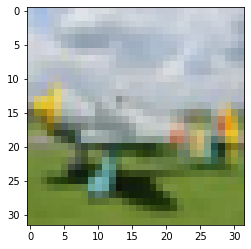

In [ ]:
import random
import numpy as np

a=np.random.randint(0, len(x_test))
plt.imshow(x_test[a].reshape(32,32,3),cmap='Greys')
pred=model.predict(x_test[a].reshape(1,32,32,3))
print('Output Digit=',pred.argmax())
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog','frog','horse','ship','truck']

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 64.34000134468079


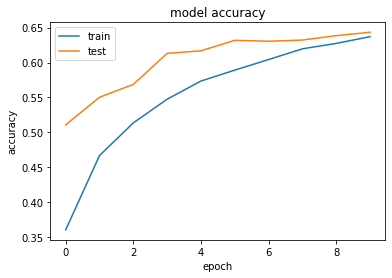

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

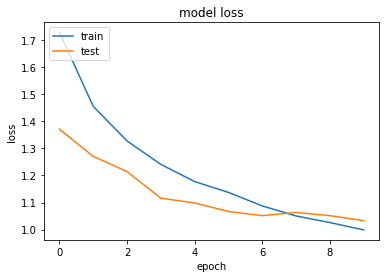

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 dense_10 (Dense)            (None, 30, 30, 512)       16896     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 512)      0         
 2D)                                                             
                                                                 
 dropout_4 (Dropout)         (None, 15, 15, 512)       0         
                                                                 
 dense_11 (Dense)            (None, 15, 15, 128)       65664     
                                                                 
 flatten_4 (Flatten)         (None, 28800)             0         
                                                      

# **Data Augmentation for CIFAR10**

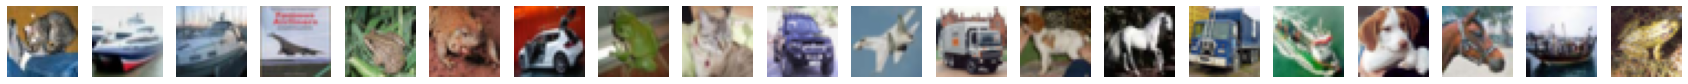

In [ ]:
plt.figure(figsize=(30,25))

for i in range(20):
    plt.subplot(1, 20, i+1)
    plt.imshow(x_test[i])
    plt.axis('off')

plt.show()

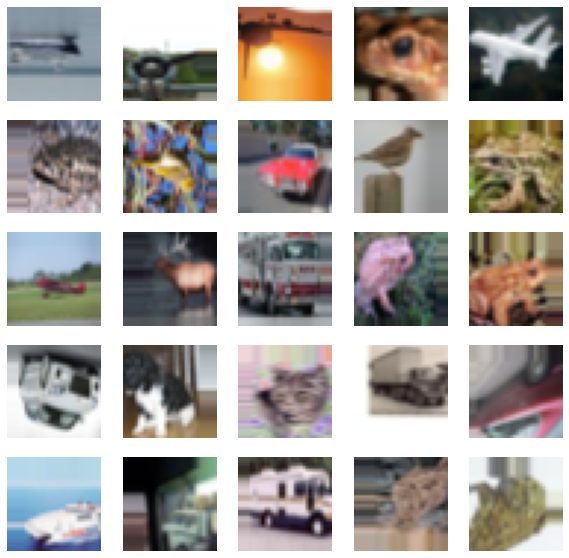

60000 images have been Flipped and adjusted to desired height


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape((X_train.shape[0], 32, 32, 3))
X_test = X_test.reshape((X_test.shape[0], 32, 32, 3))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Data Augmentation Filters----Flipping, Height Adjustment

data_augmentor = ImageDataGenerator(rescale=1./255,horizontal_flip=True, vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2)
data_augmentor.fit(X_train)

#random image selection and generation

augment = data_augmentor.flow(X_train[:], batch_size=1)
for i in range(25):
  pyplot.subplot(5,5,1 + i)

  pyplot.axis('off')
  pyplot.imshow(augment.next().squeeze())
#pyplot.figure(figsize=(10,10), dpi=150)

from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
pyplot.show()
count_train=0
count_test=0
total_dataset_1=1
for i in range(0, len(X_train)):
  count_train+=1
#print(count_train)
for j in range(0, len(X_test)):
  count_test+=1
#print(count_test)
total_dataset_1=count_train+count_test
print(total_dataset_1,'images have been Flipped and adjusted to desired height')

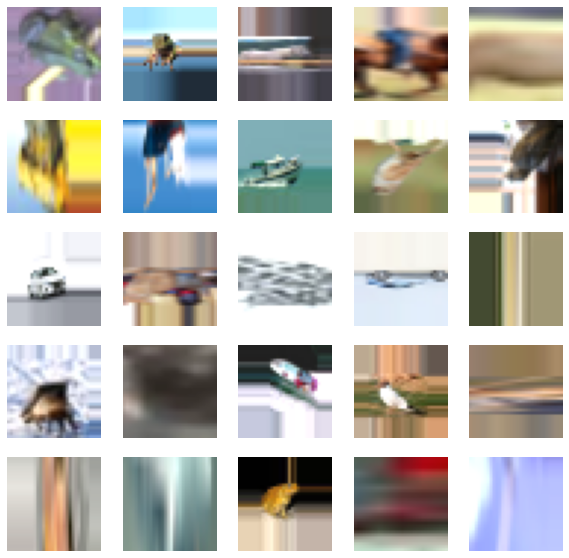

60000 images have been enlarged and iluminated


In [ ]:
#Data Augmentation Filters----Zoom, Brightness Filter
data_augmentor = ImageDataGenerator(rescale=1./255,horizontal_flip=True, vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2, zoom_range=1.5, brightness_range=[1.2,1.2])
data_augmentor.fit(X_train)
augment = data_augmentor.flow(X_train[:], batch_size=1)
for i in range(25):
  pyplot.subplot(5,5,1 + i)

  pyplot.axis('off')
  pyplot.imshow(augment.next().squeeze())
#pyplot.figure(figsize=(10,10), dpi=150)
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
pyplot.show()
count_train=0
count_test=0
total_dataset_2=0
for i in range(0, len(X_train)):
  count_train+=1
#print(count_train)
for j in range(0, len(X_test)):
  count_test+=1
#print(count_test)
total_dataset_2=count_train+count_test
print(total_dataset_2,'images have been enlarged and iluminated')

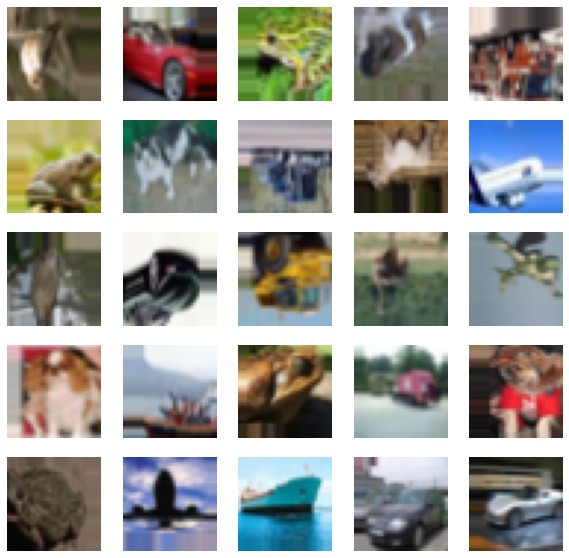

60000 images have been Rescaled


In [ ]:
#Data Augmentation Filters----Rescale Filter
data_augmentor = ImageDataGenerator(rescale=1./255,horizontal_flip=True, vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2)
data_augmentor.fit(X_train)
augment = data_augmentor.flow(X_train[:], batch_size=1)
for i in range(25):
  pyplot.subplot(5,5,1 + i)

  pyplot.axis('off')
  pyplot.imshow(augment.next().squeeze())
#pyplot.figure(figsize=(10,10), dpi=150)
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
pyplot.show()
count_train=0
count_test=0
total_dataset_3=0
for i in range(0, len(X_train)):
  count_train+=1
#print(count_train)
for j in range(0, len(X_test)):
  count_test+=1
#print(count_test)
total_dataset_3=count_train+count_test
print(total_dataset_3,'images have been Rescaled')

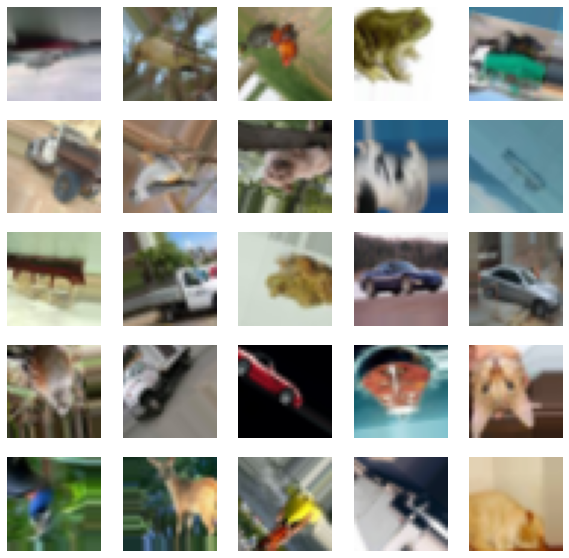

60000 images have been rotated to 45 degrees


In [ ]:
#Data Augmentation Filters----Rotation Filter
data_augmentor = ImageDataGenerator(rescale=1./255,rotation_range=45,horizontal_flip=True, vertical_flip=True, width_shift_range=0.2, height_shift_range=0.2)
data_augmentor.fit(X_train)
augment = data_augmentor.flow(X_train[:], batch_size=1)
for i in range(25):
  pyplot.subplot(5,5,1 + i)

  pyplot.axis('off')
  pyplot.imshow(augment.next().squeeze())
#pyplot.figure(figsize=(10,10), dpi=150)
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
pyplot.show()
count_train=0
count_test=0
total_dataset_4=0
for i in range(0, len(X_train)):
  count_train+=1
#print(count_train)
for j in range(0, len(X_test)):
  count_test+=1
#print(count_test)
total_dataset_4=count_train+count_test
print(total_dataset_4,'images have been rotated to 45 degrees')

In [ ]:
Final_increased_dataset=0
Final_increased_dataset=total_dataset_1+total_dataset_2+total_dataset_3+total_dataset_4
print(Final_increased_dataset)

240000


In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(32,32,3),kernel_regularizer=l2(0.001)))
#model.add(Conv2D(32, (3, 3),activation='relu', input_shape=(28,28,1)))
model.add(Dense(512, activation='relu'))
model.add(MaxPooling2D((2, 2),padding="same"))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=["accuracy"])

history=model.fit(x_train_norm, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_test_norm,y_test))

test_loss,test_acc=model.evaluate(x_test_norm, y_test)

Epoch 1/10
782/782 [==============================] - 18s 23ms/step - loss: 1.7835 - accuracy: 0.3395 - val_loss: 1.4015 - val_accuracy: 0.5083
Epoch 2/10
782/782 [==============================] - 18s 23ms/step - loss: 1.4376 - accuracy: 0.4721 - val_loss: 1.2174 - val_accuracy: 0.5697
Epoch 3/10
782/782 [==============================] - 18s 22ms/step - loss: 1.2976 - accuracy: 0.5293 - val_loss: 1.0892 - val_accuracy: 0.6185
Epoch 4/10
782/782 [==============================] - 17s 22ms/step - loss: 1.1992 - accuracy: 0.5629 - val_loss: 1.0460 - val_accuracy: 0.6325
Epoch 5/10
782/782 [==============================] - 19s 25ms/step - loss: 1.1268 - accuracy: 0.5910 - val_loss: 1.0237 - val_accuracy: 0.6487
Epoch 6/10
782/782 [==============================] - 18s 23ms/step - loss: 1.0675 - accuracy: 0.6118 - val_loss: 0.9940 - val_accuracy: 0.6565
Epoch 7/10
782/782 [==============================] - 18s 23ms/step - loss: 1.0193 - accuracy: 0.6313 - val_loss: 0.9659 - val_accuracy:

In [ ]:
print("Tested Result:",test_acc*100)

Tested Result: 67.86999702453613


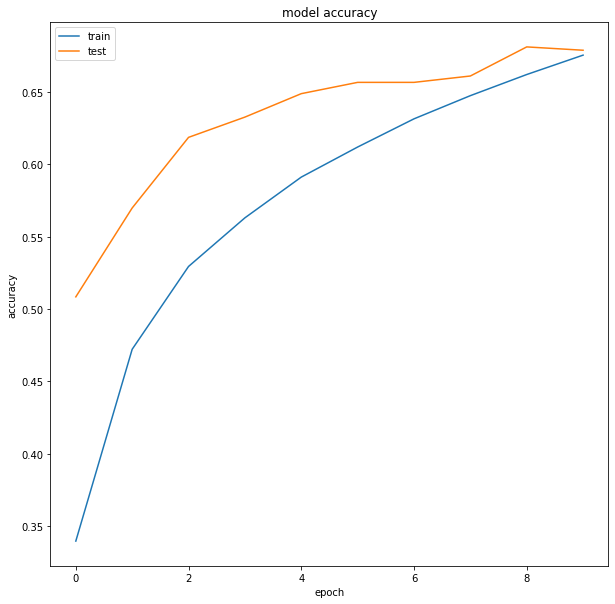

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

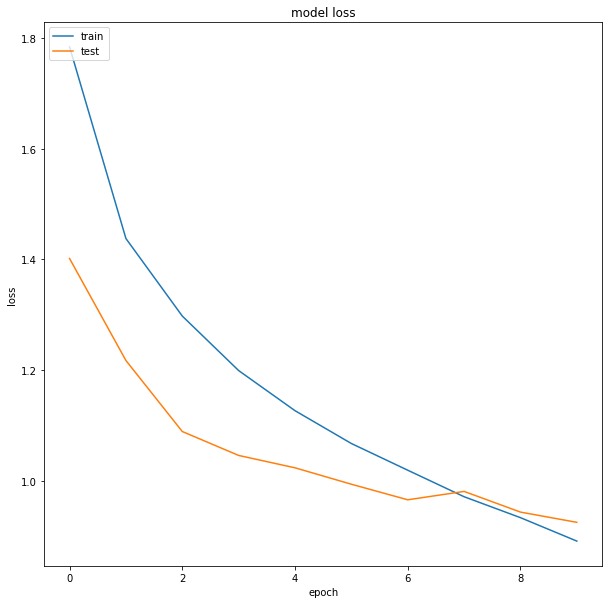

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()